# Корона вирус хугацааны таамаглал дэвшүүлэх нь
2020 оны эхэн үеэс эхэлсэн цар тахалын нас баралтын хэмжээг хугацааны таамаглал дэвшүүлэх даалгавар.
Энэхүү даалгавар нь үндсэн 3 хэсэгтэй бөгөөд үүнд:
1. Өгөгдлийг татах болон боловсруулах
2. Сургалтын загварыг боловсруулах
3. Сургалт болон дүгнэлт

##  Өгөгдлийг татах болон боловсруулах
https://ourworldindata.org/coronavirus/country/mongolia

In [1]:
import pandas as pd
import torch
import numpy as np
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder

from sklearn.model_selection import train_test_split


In [2]:
covid=pd.read_csv("owid-covid-data.csv")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
covid_mongolia=covid[covid['location']=="Mongolia"]

In [4]:
covid_mongolia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131667,MNG,Asia,Mongolia,2020-03-10,1.0,1.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
131668,MNG,Asia,Mongolia,2020-03-11,1.0,0.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
131669,MNG,Asia,Mongolia,2020-03-12,1.0,0.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
131670,MNG,Asia,Mongolia,2020-03-13,1.0,0.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
131671,MNG,Asia,Mongolia,2020-03-14,1.0,0.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN


In [5]:
covid_mongolia["date"]=pd.to_datetime(covid_mongolia["date"])

C:\Users\User\AppData\Local\Temp/ipykernel_9624/411385338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mongolia["date"]=pd.to_datetime(covid_mongolia["date"])


In [6]:
dates = pd.to_datetime(covid_mongolia["date"])

train_data = covid_mongolia[["date","new_deaths_smoothed"]] #oorchilno
# new_people_vaccinated_smoothed, new_cases_smoothed, new_deaths_smoothed
train_data["Year"] = dates.dt.year
train_data["Month"] = dates.dt.month
train_data["Day"] = dates.dt.day

C:\Users\User\AppData\Local\Temp/ipykernel_9624/2975275824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Year"] = dates.dt.year
C:\Users\User\AppData\Local\Temp/ipykernel_9624/2975275824.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Month"] = dates.dt.month
C:\Users\User\AppData\Local\Temp/ipykernel_9624/2975275824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [7]:
train_data.head()

,date,new_deaths_smoothed,Year,Month,Day
131667,2020-03-10,NaN,2020,3,10
131668,2020-03-11,NaN,2020,3,11
131669,2020-03-12,NaN,2020,3,12
131670,2020-03-13,NaN,2020,3,13
131671,2020-03-14,NaN,2020,3,14


In [8]:
train_data = train_data.dropna()
train_data.head()

,date,new_deaths_smoothed,Year,Month,Day
131955,2020-12-23,0.143,2020,12,23
131956,2020-12-24,0.143,2020,12,24
131957,2020-12-25,0.000,2020,12,25
131958,2020-12-26,0.000,2020,12,26
131959,2020-12-27,0.000,2020,12,27


In [9]:
print("Number of Confirmed Cases",covid_mongolia["total_cases"].iloc[-1], covid_mongolia["date"].iloc[-1])
print("Number of Recovered Cases",covid_mongolia["total_deaths"].iloc[-1], covid_mongolia["date"].iloc[-1])

Number of Confirmed Cases 983430.0 2022-10-06 00:00:00
Number of Recovered Cases 2131.0 2022-10-06 00:00:00


In [10]:
train_data.head()

,date,new_deaths_smoothed,Year,Month,Day
131955,2020-12-23,0.143,2020,12,23
131956,2020-12-24,0.143,2020,12,24
131957,2020-12-25,0.000,2020,12,25
131958,2020-12-26,0.000,2020,12,26
131959,2020-12-27,0.000,2020,12,27


In [11]:
# train_data = train_data.drop(columns="date")

In [12]:
le = LabelEncoder()
normalizer = Normalizer()
onehot = OneHotEncoder()
# train_data["Year"] = le.fit_transform(train_data["Year"])
# train_data["Month"] = onehot.fit_transform(train_data["Month"])
# train_data["Day"] = onehot.fit_transform(train_data["Day"])
train_data["new_deaths_smoothed"] = train_data["new_deaths_smoothed"] / np.max(train_data["new_deaths_smoothed"])
train_data.head()

,date,new_deaths_smoothed,Year,Month,Day
131955,2020-12-23,0.007882,2020,12,23
131956,2020-12-24,0.007882,2020,12,24
131957,2020-12-25,0.000000,2020,12,25
131958,2020-12-26,0.000000,2020,12,26
131959,2020-12-27,0.000000,2020,12,27


In [13]:
X, y = train_data[["new_deaths_smoothed"]].to_numpy(), train_data["new_deaths_smoothed"].to_numpy()
X_train, y_train = X[:int(len(X)*0.7)], y[:int(len(y)*0.7)]
X_test, y_test = X[int(len(X)*0.7):], y[int(len(y)*0.7):]

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[:1], y_train[:1], X_test[:1], y_test[:1])


(457, 1) (457,) (196, 1) (196,)
[[0.00788183]] [0.00788183] [[0.01576366]] [0.01576366]


In [15]:
from sklearn.linear_model import LinearRegression, ARDRegression, GammaRegressor, HuberRegressor, LogisticRegression, ridge_regression, PassiveAggressiveRegressor, PoissonRegressor,QuantileRegressor,RANSACRegressor,SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
import sklearn

In [16]:
model = LinearRegression()


In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
preds = model.predict(X_test)

In [19]:
from matplotlib import pyplot as plt

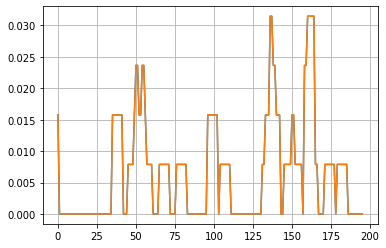

In [20]:
plt.plot(preds)
plt.plot(y_test)
plt.grid()
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error as mse

In [22]:
print(mse(preds, y_test))
print(np.average(preds)*np.max(covid_mongolia["new_deaths_smoothed"]))

2.9196784747640203e-33
0.11888775510203985


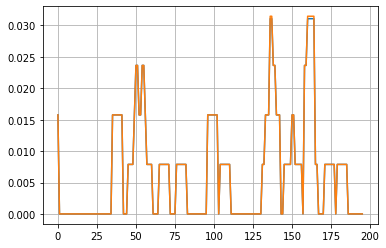

In [23]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
preds = model.predict(X_test)
plt.plot(preds)
plt.plot(y_test)
plt.grid()
plt.show()


In [24]:
mse(preds, y_test)

5.46940980621352e-09

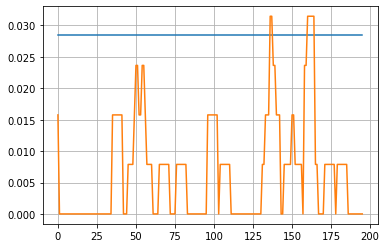

0.0005456696285801144

In [25]:

model = AdaBoostRegressor()
model.fit(X_train,y_train)
preds = model.predict(X_test)
plt.plot(preds)
plt.plot(y_test)
plt.grid()
plt.show()
mse(preds, y_test)

In [26]:
models = ["LinearRegression", "ARDRegression", #"GammaRegressor", "LogisticRegression","ridge_regression","StackingRegressor",, "VotingRegressor"
        "PassiveAggressiveRegressor", 
        "PoissonRegressor","QuantileRegressor","RANSACRegressor","SGDRegressor",
        "RandomForestRegressor", "AdaBoostRegressor", "GradientBoostingRegressor", 
        "BaggingRegressor", "HistGradientBoostingRegressor"]
def get_model(model_name):
    if model_name == "LinearRegression":
        return LinearRegression()
    elif model_name == "ARDRegression":
        return ARDRegression()
    elif model_name == "GammaRegressor":
        return GammaRegressor()
    elif model_name == "LogisticRegression":
        return LogisticRegression()
    elif model_name == "ridge_regression":
        return ridge_regression()
    elif model_name == "PassiveAggressiveRegressor":
        return PassiveAggressiveRegressor()
    elif model_name == "PoissonRegressor":
        return PoissonRegressor()
    elif model_name == "QuantileRegressor":
        return QuantileRegressor()
    elif model_name == "RANSACRegressor":
        return RANSACRegressor()
    elif model_name == "SGDRegressor":
        return SGDRegressor()
    elif model_name == "RandomForestRegressor":
        return RandomForestRegressor()
    elif model_name == "AdaBoostRegressor":
        return AdaBoostRegressor()
    elif model_name == "GradientBoostingRegressor":
        return GradientBoostingRegressor()
    elif model_name == "BaggingRegressor":
        return BaggingRegressor()
    elif model_name == "HistGradientBoostingRegressor":
        return HistGradientBoostingRegressor()
    elif model_name == "StackingRegressor":
        return StackingRegressor()
    else:
        return VotingRegressor()


def train_models():
    for model_name in models:
        print(model_name)
        model = get_model(model_name)
        model.fit(X_train,y_train)
        preds = model.predict(X_test)
        plt.plot(covid_mongolia["date"][-len(y_test):],preds)
        plt.plot(covid_mongolia["date"][-len(y_test):],y_test)
        plt.title(model_name + ": {:.4f} average: {:.2f}".format(mse(preds, y_test), mse(preds, y_test)*np.max(covid_mongolia["new_deaths_smoothed"])))
        plt.grid()
        plt.show()
        

LinearRegression


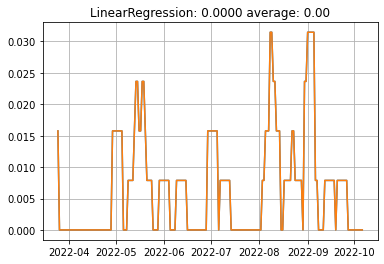

ARDRegression


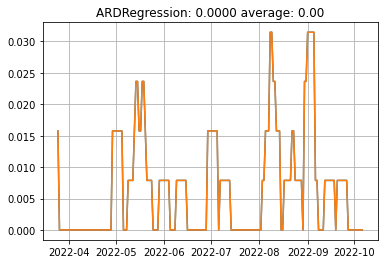

PassiveAggressiveRegressor


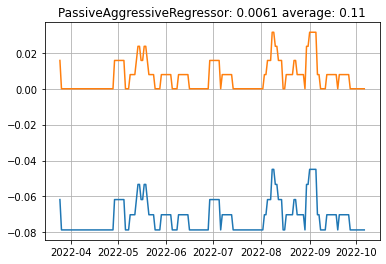

PoissonRegressor


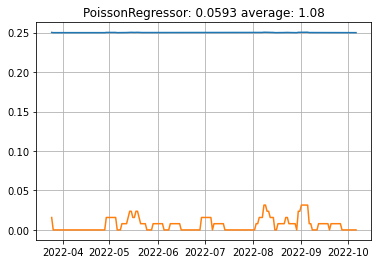

QuantileRegressor


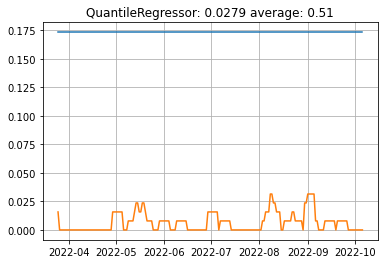

RANSACRegressor


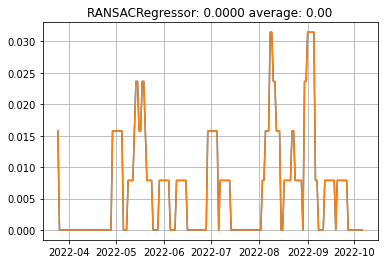

SGDRegressor


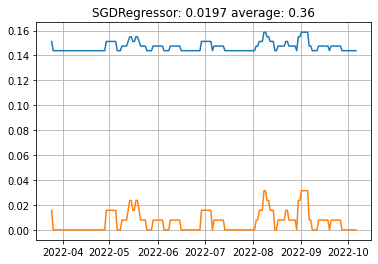

RandomForestRegressor


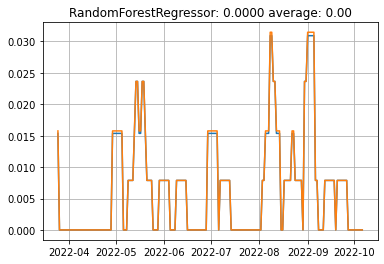

AdaBoostRegressor


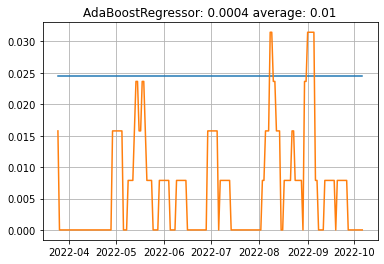

GradientBoostingRegressor


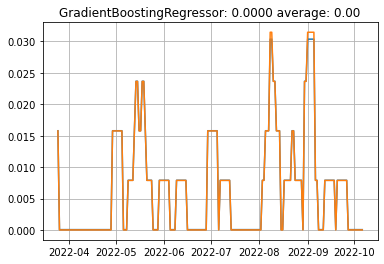

BaggingRegressor


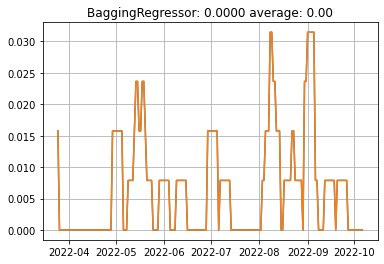

HistGradientBoostingRegressor


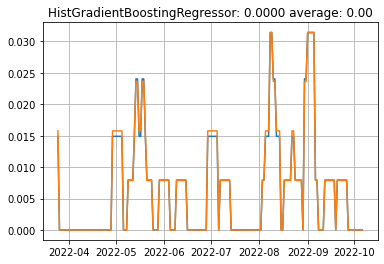

In [27]:
train_models()

# Лаборатори 7

In [28]:
X_train, y_train = X[:int(len(X)*0.7)], y[:int(len(y)*0.7)]
X_test, y_test = X[int(len(X)*0.7):], y[int(len(y)*0.7):]

In [29]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(457, 1) (457,) (196, 1) (196,)


In [30]:
class covid_dataset(torch.utils.data.Dataset):   
    def __init__(self, X, y, seq_len=10):
        self.X = X
        self.y = y
        self.seq_len = seq_len #10 udriin ugugdliig harna

    def __len__(self):
        return self.X.__len__() - (self.seq_len-1)

    def __getitem__(self, index):
        return (self.X[index:index+self.seq_len], self.y[index+self.seq_len+1]) #utga avma

In [31]:
import torch.nn as nn
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True).double()
        self.linear = nn.Linear(hidden_size, output_size).double()
        
    def forward(self, x, hidden=None):
        if hidden==None:
            self.hidden = (torch.zeros(self.num_layers,x.shape[0],self.hidden_size).double(),
                           torch.zeros(self.num_layers,x.shape[0],self.hidden_size).double())
        else:
            self.hidden = hidden
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        b,s,f = lstm_out.shape
        predictions = self.linear(lstm_out.reshape(b*s, -1))
        predictions = predictions.reshape(b,s, -1)
        return predictions[:,-1,:].reshape(-1), self.hidden

In [32]:
model = LSTM(2,20,2,1)
model.double()
train_dataset = covid_dataset(X_train, y_train, seq_len=7)
test_dataset = covid_dataset(X_test, y_test, seq_len=7)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False, drop_last=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 4, shuffle = False, drop_last=True)

In [70]:
num_epochs = 100
learning_rate = 0.003
output_size = 1
input_size = 1
hidden_size = 10
num_layers = 1

lstm = LSTM(input_size, hidden_size, num_layers, output_size)
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
# Train the model
for epoch in range(num_epochs):
    epoch_loss = []
    for x, y in train_loader:
        outputs,_ = lstm(x)
        optimizer.zero_grad()
        # obtain the loss function
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        epoch_loss.append(loss.item())
        #if (epoch +1) % 2 == 0:
           # print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
    epoch_avg = sum(epoch_loss) / len(epoch_loss)
    print(epoch_avg)
        

0.04361186383321001
0.04510736388334198
0.030463395883537917
0.02001237678517693
0.01334748047159573
0.010733774200963043
0.009168084671132242
0.008096982960136303
0.007292050077483533
0.006647247922096555
0.0061074383075588245
0.0056411126364877525
0.00522880250687291
0.004857719304704436
0.004519066969306791
0.004206636073534822
0.003916132167202828
0.0036450284332889826
0.0033928154673132614
0.0031611598630389014
0.0029521390510523523
0.00276273639024983
0.0025856068521817243
0.0024274858755876745
0.002304273343096148
0.0022156787951603508
0.0021510789135750093
0.0021016813774535066
0.0020621357062367987
0.0020299037025908735
0.0020036554631900783
0.0019825021609087665
0.0019657072071883612
0.0019525682413875727
0.0019424041271875806
0.0019345675447162223
0.0019284681151801875
0.0019235900464966312
0.0019195018201832923
0.0019158578765671346
0.0019123938935958448
0.001908918034360008
0.00190529990024274
0.0019014589280641773
0.0018973532519869537
0.001892969833101741
0.0018883161582

In [71]:
criterion = torch.nn.MSELoss()
out_list = []
target = []
# Train the model
for x, y in test_loader:
    outputs,_ = lstm(x)
    optimizer.zero_grad()
    # obtain the loss function
    loss1 = criterion(outputs, y)
    out_list.append(outputs)
    target.append(y)
    if (epoch +1) % 2 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss1.item()))
    T = torch.cat(out_list)
    Y = torch.cat(target)
    print(T)
    print(Y)

Epoch: 99, loss: 0.00019
tensor([0.0132, 0.0142, 0.0142, 0.0142], dtype=torch.float64,
       grad_fn=<CatBackward0>)
tensor([0., 0., 0., 0.], dtype=torch.float64)
Epoch: 99, loss: 0.00020
tensor([0.0132, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142],
       dtype=torch.float64, grad_fn=<CatBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)
Epoch: 99, loss: 0.00020
tensor([0.0132, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142,
        0.0142, 0.0142, 0.0142], dtype=torch.float64, grad_fn=<CatBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)
Epoch: 99, loss: 0.00020
tensor([0.0132, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142,
        0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142],
       dtype=torch.float64, grad_fn=<CatBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)
Epoch: 99, loss: 0.00020
tensor([0.0132,

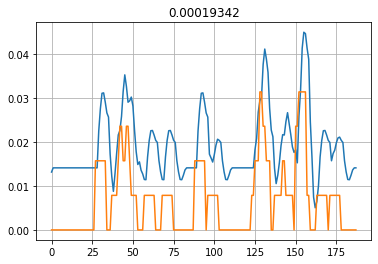

In [72]:
plt.plot(T.detach().numpy())
plt.plot(Y.detach().numpy())
loss1 = criterion(T, Y)
plt.title("{:.8f}".format(loss1.item()))
plt.grid()
plt.show()

# Лаборатори 7: Даалгавар 
1. LSTM сургалт болон тестийг хэрэгжүүлэх
2. LSTM Layer тоо, hidden_num, гэх мэт туслах параметрүүдийг өөрчлөн сургалтын алдааг багасгах
3. Оролтын өгөгдлийн feature - ийг дахин сонгож сургалт явуулах
4. Сургалт зөв болсон эсэхийг тестийн санд сургасан загвараар таамаглал гарган график байгуулан шалгах
5. Тестийн алдаа болон сургалтын алдаанд дүгнэлт хийх.

# Лаборатори 8: Даалгавар 
1. Transformer сургалт болон тестийг хэрэгжүүлэх
2. Transformer Layer тоо, hidden_num, гэх мэт туслах параметрүүдийг өөрчлөн сургалтын алдааг багасгах
3. Оролтын өгөгдлийн feature - ийг дахин сонгож сургалт явуулах
4. Сургалт зөв болсон эсэхийг тестийн санд сургасан загвараар таамаглал гарган график байгуулан шалгах
5. Тестийн алдаа болон сургалтын алдаанд дүгнэлт хийх.